## Product and Customer Analytics

In [1]:
# Import  the appropriate libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%matplotlib inline

In [2]:
# pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import openpyxl

In [5]:
# import the dataset from UCI machine learning laboratory site. It is an excel file
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [31]:
df.shape

(506150, 9)

In [29]:
# Use the head function
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Distribution of the Quantity Column

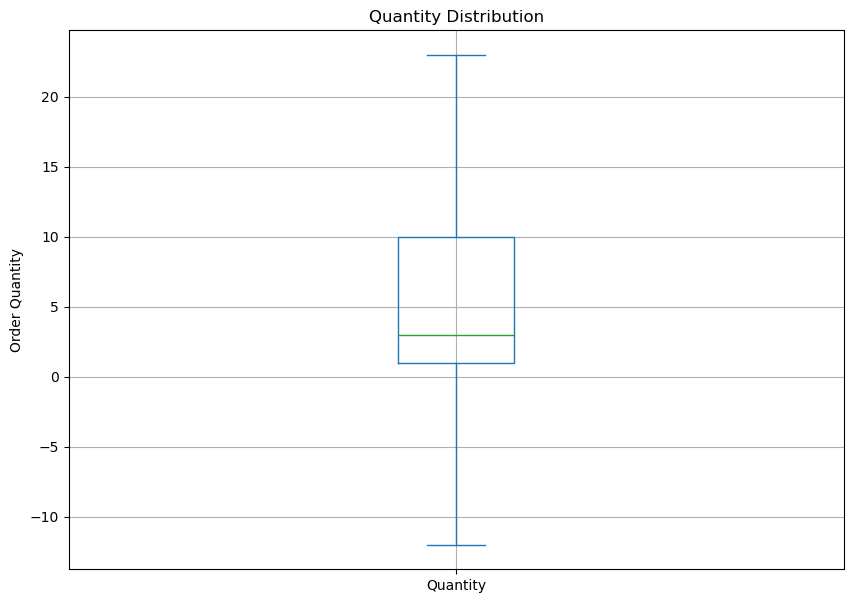

In [8]:
# Create a box plot to identify outliers
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [9]:
# Filter out the negative quantity orders
df = df.loc[df.Quantity>0]

In [10]:
# Check the shape again
df.shape

(531285, 8)

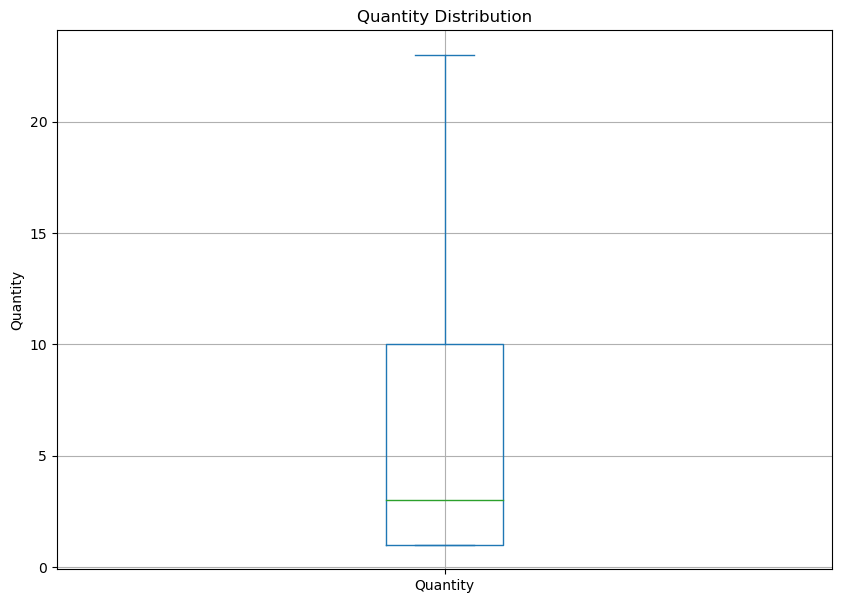

In [12]:
# Create a Box plot without negative quantity
retail = df['Quantity'].plot.box(showfliers=False, grid=True,figsize=(10, 7))
retail.set_ylabel('Quantity')
retail.set_title('Quantity Distribution')

plt.show()

## Time Series Trends

    -> Number of orders
    -> Revenue

In [13]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [14]:
m_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

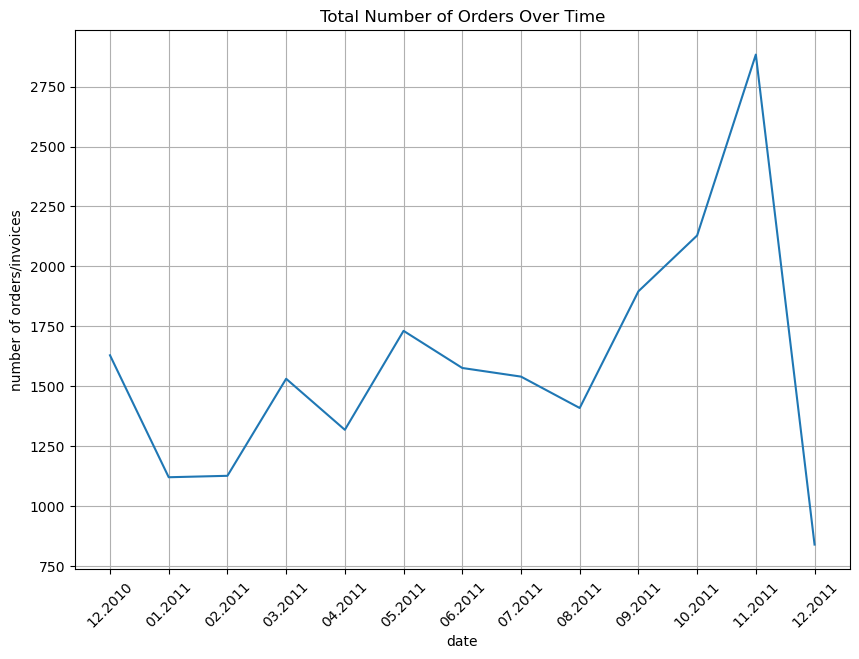

In [15]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [16]:
# Get all invoice dates from December 1, 2011 
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [17]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


Q. What do you observe?

From the above output, it is clear that the December sales data are insufficient to draw any conclusions.The data is only available for the first through ninth days of December 2011

In [18]:
# Remove the December 2011 data
df = df.loc[df.InvoiceDate<'2011-12-01']
# Recalculate the monthly distribution
m_orders_df2 = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

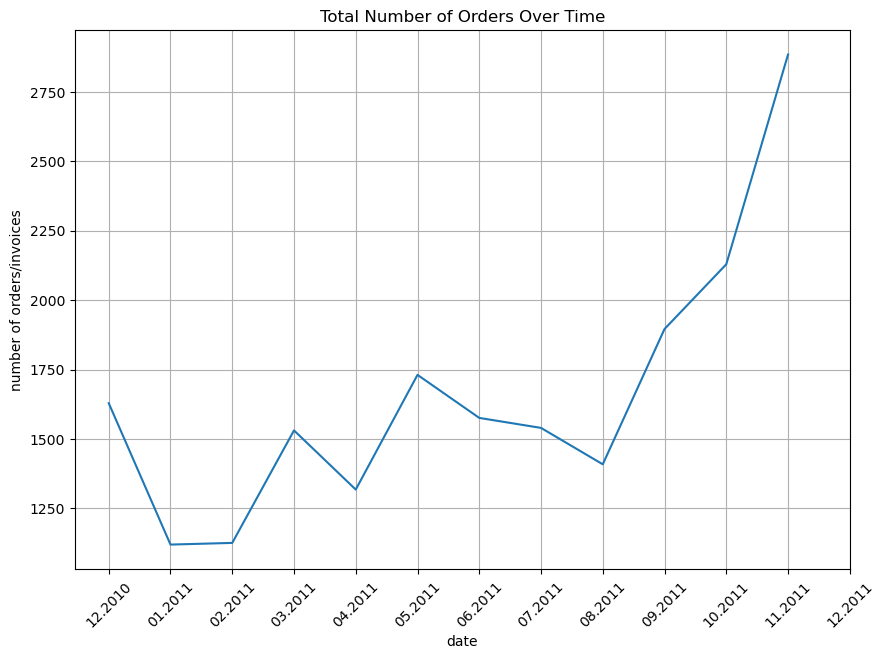

In [21]:
# Create the line chart again
ax = pd.DataFrame(m_orders_df2.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)


ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)),
    [x.strftime('%m.%Y') for x in m_orders_df.index],
    rotation=45
)


plt.show()

In [23]:
# Calculate sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [24]:
m_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

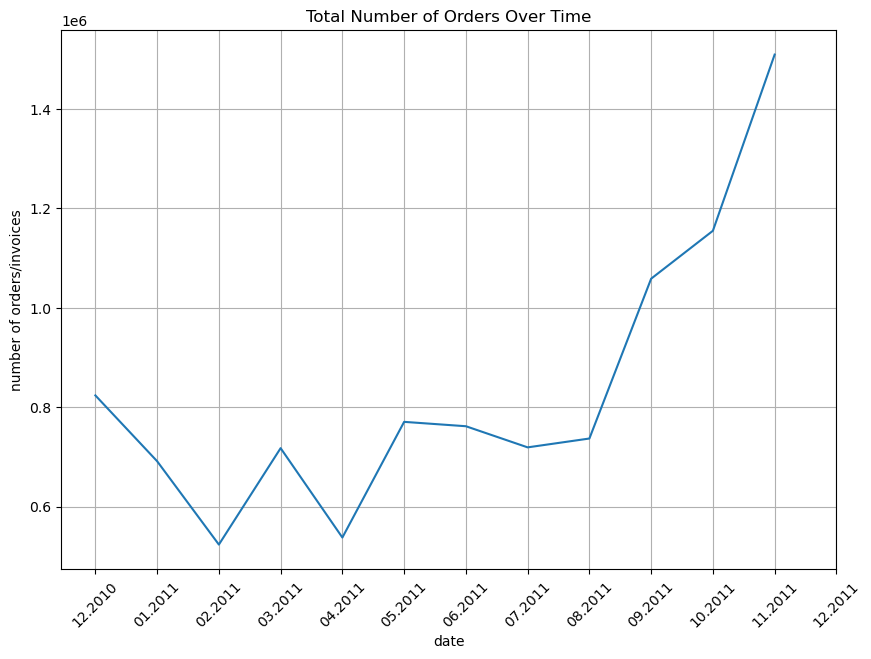

In [26]:
# Create a Line Plot for revenue
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)


ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')


# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)),
    [x.strftime('%m.%Y') for x in m_orders_df.index],
    rotation=45
)

plt.show()

In [ ]:
Q Do you see a similar pattern with the order by month line chart? 
Yes, we can see similar patterns with the order by month chart and we can see november month has the highest reveneue

## Repeat Customers

In [28]:
# Run the head function on  the original dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Q. What do you notice with the invoice number?

  We can see there are multiple orders with different description with same invoice number

### Calculate the repeat customers

In [33]:
# Aggregate the raw data for each Invoice No.
invoice_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [34]:
invoice_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [35]:
# Aggregate by month
#Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [36]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [37]:
# Calculate the unique customers
m_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [38]:
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [39]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_repeat_percentage =(m_repeat_customers_df / m_unique_customers_df )*100.0
m_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

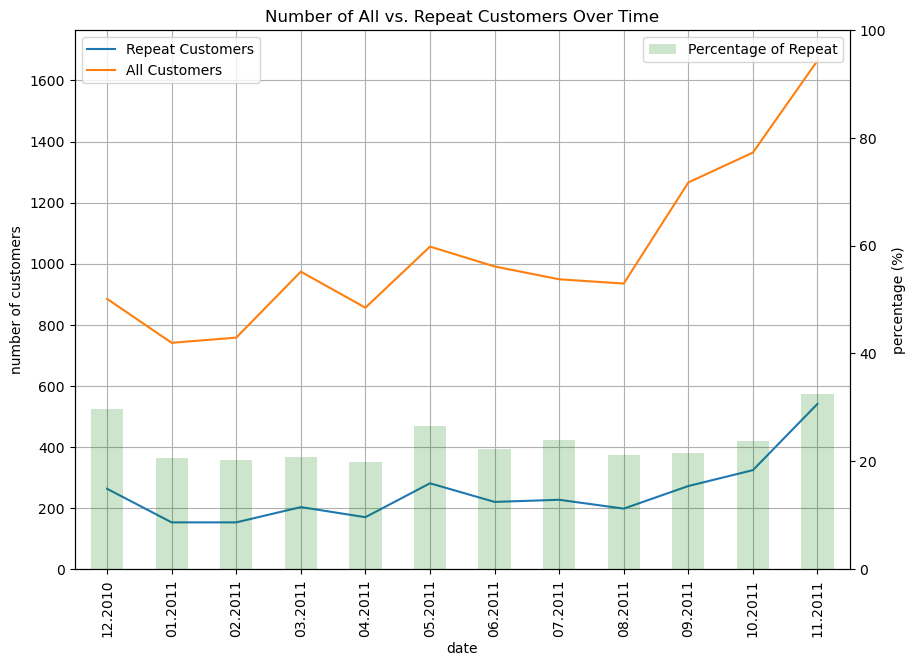

In [40]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

Q. Comment on the distribution


According to the following plot, there are more one-time customers than repeat ones, and both the total number of customers and the repeat customer count have been increasing since the middle of August 2011. 
There has been an increase of roughly 20% in return clients. Therefore, returning customers will be advantageous to online retailers. 

In [42]:
# Calculate Monthly revenue of repeat customers
m_rev_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# Calculate and show the % of revenue for repeat and all customers by month
m_rev_perc_repeat_customers_df = m_rev_repeat_customers_df/m_revenue_df*100

In [43]:
m_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

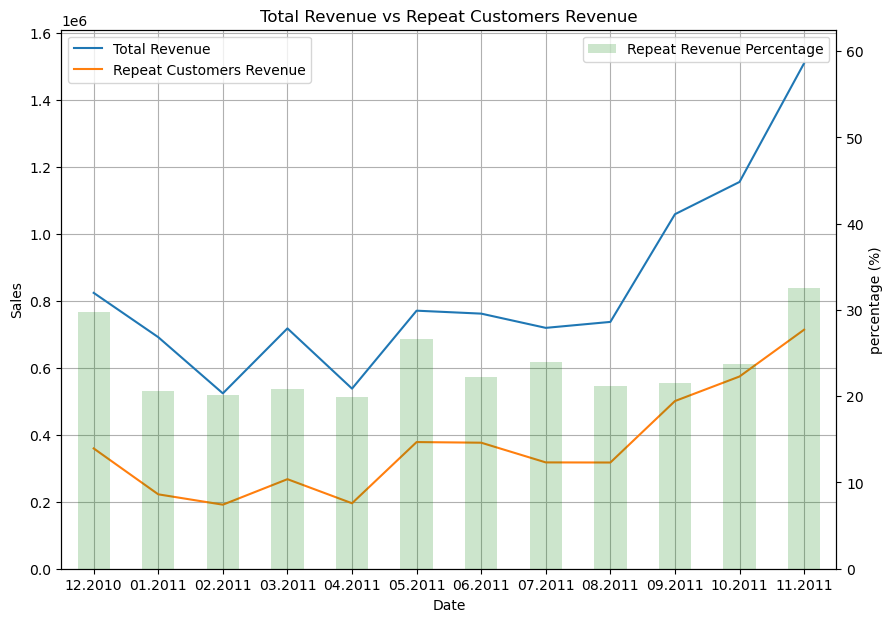

In [44]:
# Plot the  chart for Revenue and % (Dual axis chart)
plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(10,7))



pd.DataFrame(m_rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)



plot1.set_xlabel('Date')
plot1.set_ylabel('Sales')
plot1.set_title('Total Revenue vs Repeat Customers Revenue')



plot1.legend(['Total Revenue', 'Repeat Customers Revenue'])



plot1.set_ylim([0, m_revenue_df.values.max()+100000])



plot2 = plot1.twinx()



pd.DataFrame(m_repeat_percentage.values).plot(
    ax = plot2,
    kind = 'bar',
    color = 'g',
    alpha=0.2)



plot2.set_ylim([0, max(m_repeat_percentage.values)+30])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])
plot2.set_xticklabels(
    [x.strftime('%m.%Y') for x in m_repeat_percentage.index])
plt.show()

Q. Comment on the distribution

The aforementioned chart illustrates a similar trend pattern as sales began to increase in mid-August and September. 
Returning customers account for about 40–50% of sales almost every month. 

## Trending Items Over Time (How customers enagage with individual products) 

### By Quantity

In [41]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum())

In [45]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

### By Sales 

In [46]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
m_rev_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum())
                        

# Lets find out what items were sold the most by sales on November 30, 2011
last_m_rev_sorted_df = m_rev_df.loc['2011-11-30'].sort_values(
    by='Sales', ascending=False
).reset_index()

In [48]:
# Print both the dataframes
m_rev_df

Sales
InvoiceDate StockCode          
2010-12-31  10002        234.41
            10120          3.36
            10125         90.86
            10133         85.27
            10135        279.02
...                         ...
2011-11-30  C2          1150.00
            DCGSSGIRL      3.29
            DOT        36905.40
            M           3312.42
            POST       10352.98

[31701 rows x 1 columns]

In [49]:
last_m_rev_sorted_df

,StockCode,Sales
0,DOT,36905.40
1,23084,34556.72
2,22086,28985.04
3,22197,14195.60
4,85123A,14136.70
...,...,...
2941,22925,0.00
2942,21071,0.00
2943,46000U,0.00
2944,22848,0.00


In [50]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            84826        119.10
            85099B      4019.15
2011-01-31  22086        143.32
            22197       1495.48
            84826        100.80
            85099B      5047.65
2011-02-28  22086         24.95
            22197       2127.00
            84826         17.70
            85099B      5617.24
2011-03-31  22086        232.01
            22197       3032.81
            84826         51.00
            85099B     10118.38
2011-04-30  22086         44.03
            22197       1495.57
            84826          0.85
            85099B      4878.08
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85099B      7122.73
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            84826          3.40
            85099B      7247.98
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            84826          1.70
            85099B      6253.87
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            84826         61.20
            85099B     10796.56
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85099B      8884.33
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            84826          9.35
            85099B     10485.81
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            84826          9.35
            85099B     11641.37

In [51]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
itmes_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
itmes_df = itmes_df.reset_index()
itmes_df = itmes_df.set_index('InvoiceDate')
itmes_df.columns = itmes_df.columns.droplevel(0)

In [52]:
itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,119.10,4019.15
2011-01-31,143.32,1495.48,0.00,100.80,5047.65
2011-02-28,24.95,2127.00,0.00,17.70,5617.24
2011-03-31,232.01,3032.81,0.00,51.00,10118.38
2011-04-30,44.03,1495.57,0.00,0.85,4878.08
2011-05-31,65.19,5151.63,2279.57,0.00,7122.73
2011-06-30,910.88,1706.91,3326.87,3.40,7247.98
2011-07-31,1077.93,1540.00,668.59,1.70,6253.87
2011-08-31,1334.94,4133.35,3533.57,61.20,10796.56


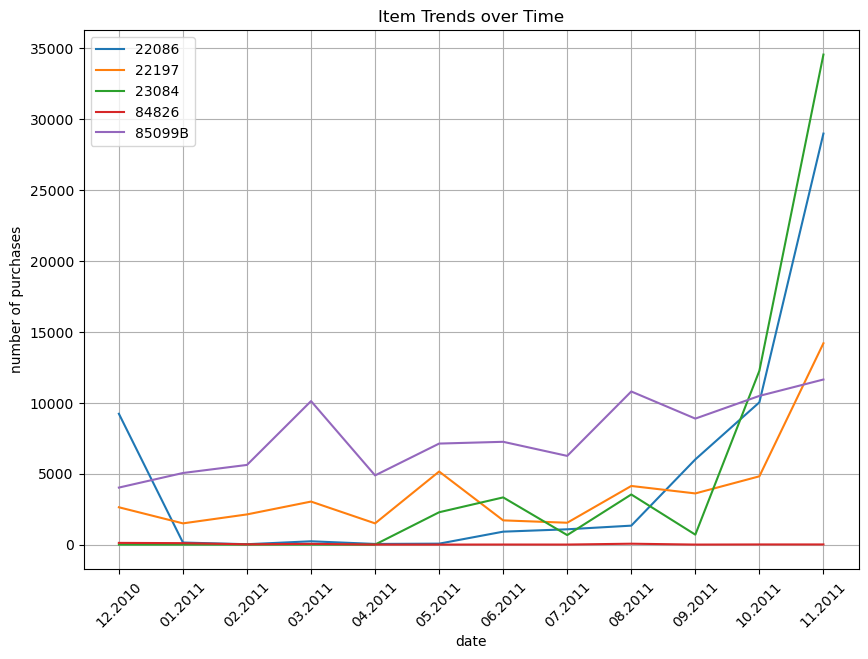

In [53]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(itmes_df.index)), 
    [x.strftime('%m.%Y') for x in itmes_df.index], 
    rotation=45
)

plt.show()

Q. What do you observe?

Almost all product sales, with the exception of 85099B, have decreased since December 2010 according to the aforementioned graph. All product sales peaked in the months of April and July.

From February to April 2011, the price of stock numbers 22086, 84826, and 23084 was nearly zero. In October and November 2011, however, there was a sharp increase.

In [54]:
print(last_m_rev_sorted_df.head())

  StockCode     Sales
0       DOT  36905.40
1     23084  34556.72
2     22086  28985.04
3     22197  14195.60
4    85123A  14136.70


In [55]:
# Use the top 5 items by sales and find the monthly sales for those items 
m_rev_df  = pd.DataFrame(
    df.loc[
        df['StockCode'].isin(['DOT', 23084, 22086, 22197, '85123A'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_rev_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            85123A     10435.36
            DOT        24671.19
2011-01-31  22086        143.32
            22197       1495.48
            85123A     15223.21
            DOT        13921.82
2011-02-28  22086         24.95
            22197       2127.00
            85123A      5140.11
            DOT        10060.57
2011-03-31  22086        232.01
            22197       3032.81
            85123A      5597.90
            DOT        11829.71
2011-04-30  22086         44.03
            22197       1495.57
            85123A     10017.79
            DOT         7535.38
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85123A     11216.42
            DOT        10229.30
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            85123A      4680.81
            DOT        11848.66
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            85123A      8504.11
            DOT        12841.00
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            85123A      5620.57
            DOT        13400.52
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85123A      6957.46
            DOT        15177.40
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            85123A      4761.95
            DOT        17955.13
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            85123A     14136.70
            DOT        36905.40

In [56]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
sales_df = m_rev_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
sales_df = sales_df.reset_index()
sales_df = sales_df.set_index('InvoiceDate')
sales_df.columns = sales_df.columns.droplevel(0)

In [57]:
sales_df

StockCode,22086,22197,23084,85123A,DOT
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,10435.36,24671.19
2011-01-31,143.32,1495.48,0.00,15223.21,13921.82
2011-02-28,24.95,2127.00,0.00,5140.11,10060.57
2011-03-31,232.01,3032.81,0.00,5597.90,11829.71
2011-04-30,44.03,1495.57,0.00,10017.79,7535.38
2011-05-31,65.19,5151.63,2279.57,11216.42,10229.30
2011-06-30,910.88,1706.91,3326.87,4680.81,11848.66
2011-07-31,1077.93,1540.00,668.59,8504.11,12841.00
2011-08-31,1334.94,4133.35,3533.57,5620.57,13400.52


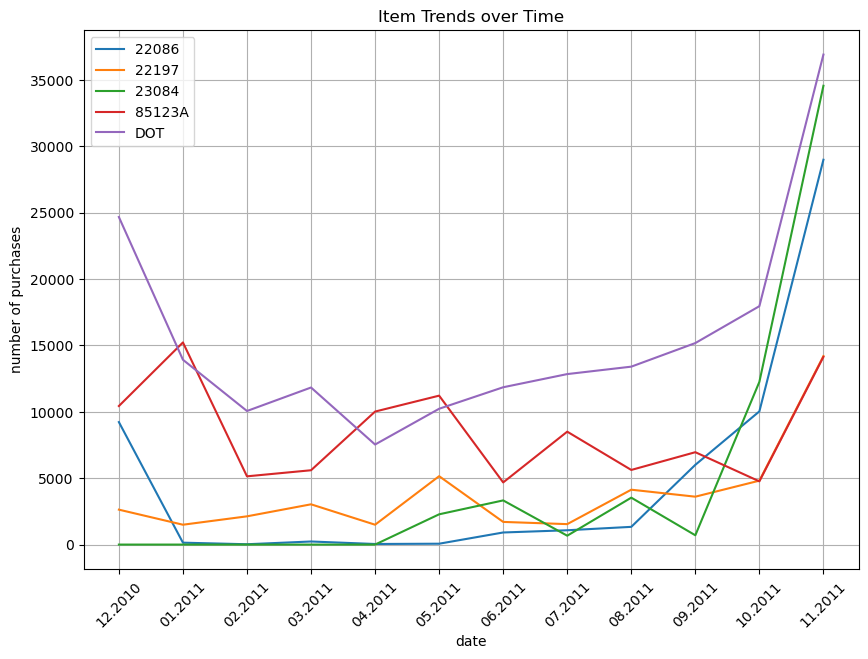

In [58]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(sales_df.values).plot(
    figsize=(10,7),
    grid=True,
)


plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(sales_df.columns, loc='upper left')

plt.xticks(
    range(len(sales_df.index)),
    [x.strftime('%m.%Y') for x in sales_df.index],
    rotation=45
)

plt.show()

Q. What do you observe?

According to the aforementioned graph, all goods' sales, with the exception of 85123A, almost all experienced a fall after December 2010. Their peak lows were reached in the months of September and October. number 22086, a that was virtually worthless between February and October 2011. Then, in November 2011, there is a dramatic increase. This item may have gained greater popularity than it had previously as a result of a true change in consumer tastes or it may simply be a seasonal item. a product that is well-liked in the month of November. All of the items' sales climbed significantly after October.

In [59]:
# Drop NaN records
df = df[pd.notnull(df['CustomerID'])]

In [60]:
df.shape

(380620, 9)

In [61]:
 # Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [62]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

Q. Comment on the results of product analytics and Customer Analytics from a marketing perspective

According to the analysis, designs and adjustments can be highly helpful in learning what people are drawn to and purchase. Marketing emails and other kinds of contact can be used to promote these subjects and encourage greater client participation. These items thrill consumers, who are more likely to buy them. Because of this, promotion engagement is better when customers are focused on these well-known things.